In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kakinimurugaian","key":"b6072c3a640358915f31c82dcb20d49f"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals

 98% 644M/656M [00:04<00:00, 185MB/s]
100% 656M/656M [00:04<00:00, 168MB/s]


In [ ]:
!unzip /content/animal-image-dataset-90-different-animals.zip

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/bison/73b10839bc.jpg  
  inflating: animals/animals/bison/74dc1dd32a.jpg  
  inflating: animals/animals/bison/75ab166a7d.jpg  
  inflating: animals/animals/bison/79e1610d01.jpg  
  inflating: animals/animals/bison/7ba5eee91f.jpg  
  inflating: animals/animals/bison/7d214aab4b.jpg  
  inflating: animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animals/animals/bison/82ec723a4f.jpg  
  inflating: animals/animals/bison/85e145af6c.jpg  
  inflating: animals/animals/bison/862e2c6379.jpg  
  inflating: animals/animals/bison/87a5c700ad.jpg  
  inflating: animals/animals/bison/88b723ce90.jpg  
  inflating: animals/animals/bison/8c3af742c3.jpg  
  inflating: animals/animals/bison/8e34044b98.jpg  
  inflating: animals/animals/bison/8e6adbdc40.jpg  
  inflating: animals/animals/bison/8fce80d5ba.jpg  
  inflating: animals/animals/bison/961a895686.jpg  
  inflating: animals/animals/bison/984a5b583d.jpg  
  inflating: 

DATA AGUMENTATION

In [ ]:
# import necessary libraries

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# data augmentation for training variable

train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,horizontal_flip=True)

In [ ]:
# data augmentation for testing variable

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# data augmentation for training variable

xtrain = train_datagen.flow_from_directory('/content/animals',target_size =(64,64),class_mode = 'categorical',batch_size =100)

Found 5400 images belonging to 1 classes.


In [ ]:
# data augmentation for testing variable

xtest = test_datagen.flow_from_directory('/content/animals',target_size =(64,64),class_mode = 'categorical',batch_size =100)

Found 5400 images belonging to 1 classes.


CNN MODEL BUIDING

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
# adding layers

model = Sequential() # Initializing sequential model
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max poolin layer
model.add(Flatten()) # Flatten layer 
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(4,activation='relu')) # Output layer 

In [ ]:
# Compile the model

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train the model

model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=10,validation_data=xtest,validation_steps=len(xtest))

<ipython-input-16-4c5be82caa97>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=10,validation_data=xtest,validation_steps=len(xtest))


Epoch 1/10
54/54 [==============================] - 258s 5s/step - loss: 33.6225 - accuracy: 0.4422 - val_loss: 33.6225 - val_accuracy: 0.3943
Epoch 2/10
54/54 [==============================] - 252s 5s/step - loss: 33.6225 - accuracy: 0.4776 - val_loss: 33.6225 - val_accuracy: 0.4217
Epoch 3/10
54/54 [==============================] - 255s 5s/step - loss: 33.6225 - accuracy: 0.4741 - val_loss: 33.6225 - val_accuracy: 0.7552
Epoch 4/10
54/54 [==============================] - 252s 5s/step - loss: 33.6225 - accuracy: 0.5004 - val_loss: 33.6225 - val_accuracy: 0.4928
Epoch 5/10
54/54 [==============================] - 253s 5s/step - loss: 33.6225 - accuracy: 0.4956 - val_loss: 33.6225 - val_accuracy: 0.3446
Epoch 6/10
54/54 [==============================] - 253s 5s/step - loss: 33.6225 - accuracy: 0.4985 - val_loss: 33.6225 - val_accuracy: 0.8107
Epoch 7/10
54/54 [==============================] - 253s 5s/step - loss: 33.6225 - accuracy: 0.5039 - val_loss: 33.6225 - val_accuracy: 0.6024

In [ ]:
# save model

model.save('animal.h5')

TESTING THE MODEL

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

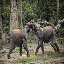

In [ ]:
# Testing 1

img =image.load_img('/content/animals/animals/elephant/27f0f7f555.jpg',target_size =(64,64))
img

In [ ]:
x = image.img_to_array(img) # converting the image to array
x= np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probablity index
op = ['bears','crows','elephant','rats']
op[pred]

1/1 [==============================] - 0s 145ms/step


'rats'

In [ ]:
# Testing 2

img =image.load_img('/content/animals/animals/bear/4286c87550.jpg',target_size =(64,64))
x = image.img_to_array(img) # converting the image to array
x= np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probablity index
op = ['bears','crows','elephant','rats']
op[pred]

1/1 [==============================] - 0s 33ms/step


'bears'

In [ ]:
# Testing 3

img =image.load_img('/content/animals/animals/crow/06a9c44c55.jpg',target_size =(64,64))
x = image.img_to_array(img) # converting the image to array
x= np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probablity index
op = ['bears','crows','elephant','rats']
op[pred]

1/1 [==============================] - 0s 52ms/step


'bears'

In [ ]:
# Testing 4

img =image.load_img('/content/animals/animals/rat/1a7e08e47c.jpg',target_size =(64,64))
x = image.img_to_array(img) # converting the image to array
x= np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probablity index
op = ['bears','crows','elephant','rats']
op[pred]

1/1 [==============================] - 0s 37ms/step


'bears'